In [183]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [184]:
dataset=pd.read_csv('https://raw.githubusercontent.com/riksohet2018/parser_profi.ru/master/output.csv',delimiter=',')
# Are there any missing values? In what columns?
np.round(dataset.isna().sum()[dataset.isna().sum()>0] / dataset.shape[0], 2)
dataset.head()

,Unnamed: 0,Fullname,CountRates,TotalRate,FiveRate,FourRate,ThreeRate,TwoRate,OneRate,латынь,медицинская латынь
0,0,Мария Юрьевна Ледышева,42,"4,86",39,1,1,1,0,2000.0,2000.0
1,1,Михаил Михайлович Миральев,136,"4,86",119,10,3,1,0,1670.0,NaN
2,2,Марк Арташесович Ширинян,113,"4,82",97,11,3,1,0,1330.0,NaN
3,3,Юлия Александровна Василенко,90,"4,93",84,6,0,0,0,1900.0,1900.0
4,4,Лилия Юрьевна Косова,34,"5,0",34,0,0,0,0,900.0,900.0


In [185]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          45 non-null     int64  
 1   Fullname            45 non-null     object 
 2   CountRates          45 non-null     int64  
 3   TotalRate           45 non-null     object 
 4   FiveRate            45 non-null     int64  
 5   FourRate            45 non-null     int64  
 6   ThreeRate           45 non-null     int64  
 7   TwoRate             45 non-null     int64  
 8   OneRate             45 non-null     int64  
 9   латынь              44 non-null     float64
 10  медицинская латынь  18 non-null     float64
dtypes: float64(2), int64(7), object(2)
memory usage: 4.0+ KB


In [186]:
correlations_data = dataset.corr().sort_values(by='FiveRate')
print(correlations_data)

                    Unnamed: 0  CountRates  ...    латынь  медицинская латынь
Unnamed: 0            1.000000   -0.364922  ... -0.071041           -0.173292
OneRate              -0.104472    0.062508  ... -0.076861           -0.136374
медицинская латынь   -0.173292    0.123008  ...  0.996614            1.000000
латынь               -0.071041    0.372063  ...  1.000000            0.996614
TwoRate              -0.329234    0.591597  ...  0.121033            0.195901
ThreeRate            -0.361767    0.714205  ...  0.074643            0.020251
FourRate             -0.321269    0.897555  ...  0.219831            0.003254
CountRates           -0.364922    1.000000  ...  0.372063            0.123008
FiveRate             -0.375760    0.998410  ...  0.381057            0.139579

[9 rows x 9 columns]


In [187]:
mis_value=np.round(dataset.isna().sum()[dataset.isna().sum()>0] / dataset.shape[0], 5)
print(mis_value)
features_with_na = dataset.isna().sum()[dataset.isna().sum() > 0] / dataset.shape[0]
list_to_drop = features_with_na[features_with_na > 0.3].index.tolist()
print(list_to_drop)

латынь                0.02222
медицинская латынь    0.60000
dtype: float64
['медицинская латынь']


In [188]:
mean_coast = dataset['латынь']
mean_coast1 = dataset['медицинская латынь']
print('Средняя стоимость занятия Латынь:', np.round(mean_coast.mean(),2))
print('Средняя стоимость занятия Медицинская латынь:', np.round(mean_coast1.mean(),2))

Средняя стоимость занятия Латынь: 1368.64
Средняя стоимость занятия Медицинская латынь: 1422.22


Минимальная цена: 600.0
Максимальный цена: 3000.0


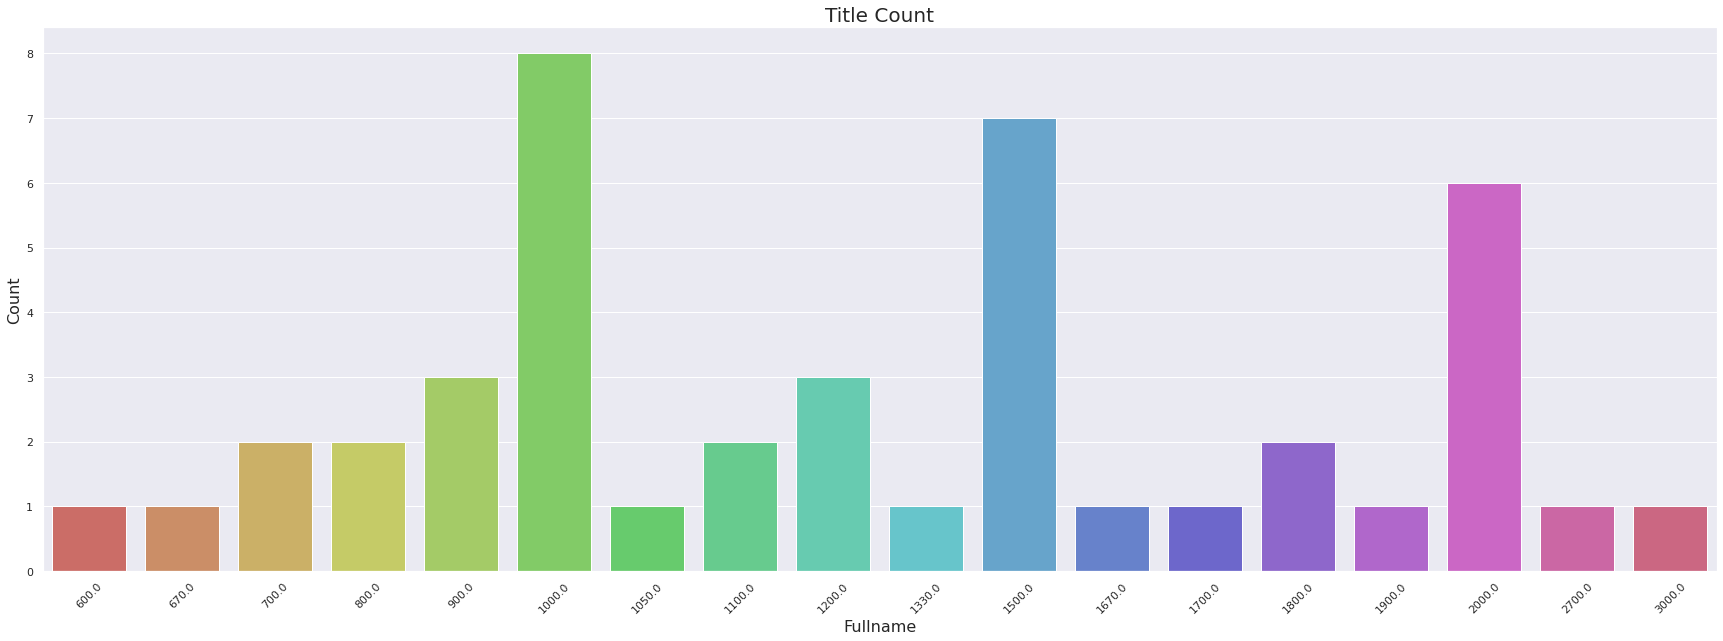

In [189]:
plt.figure(figsize=(30,10))

sns.countplot(x='латынь', data=dataset, palette="hls")
plt.xlabel("Fullname", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Count", fontsize=20)
plt.xticks(rotation=45)
min_price = dataset['латынь'].min()
max_price = dataset['латынь'].max()
print('Минимальная цена:', min_price)
print('Максимальный цена:', max_price)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


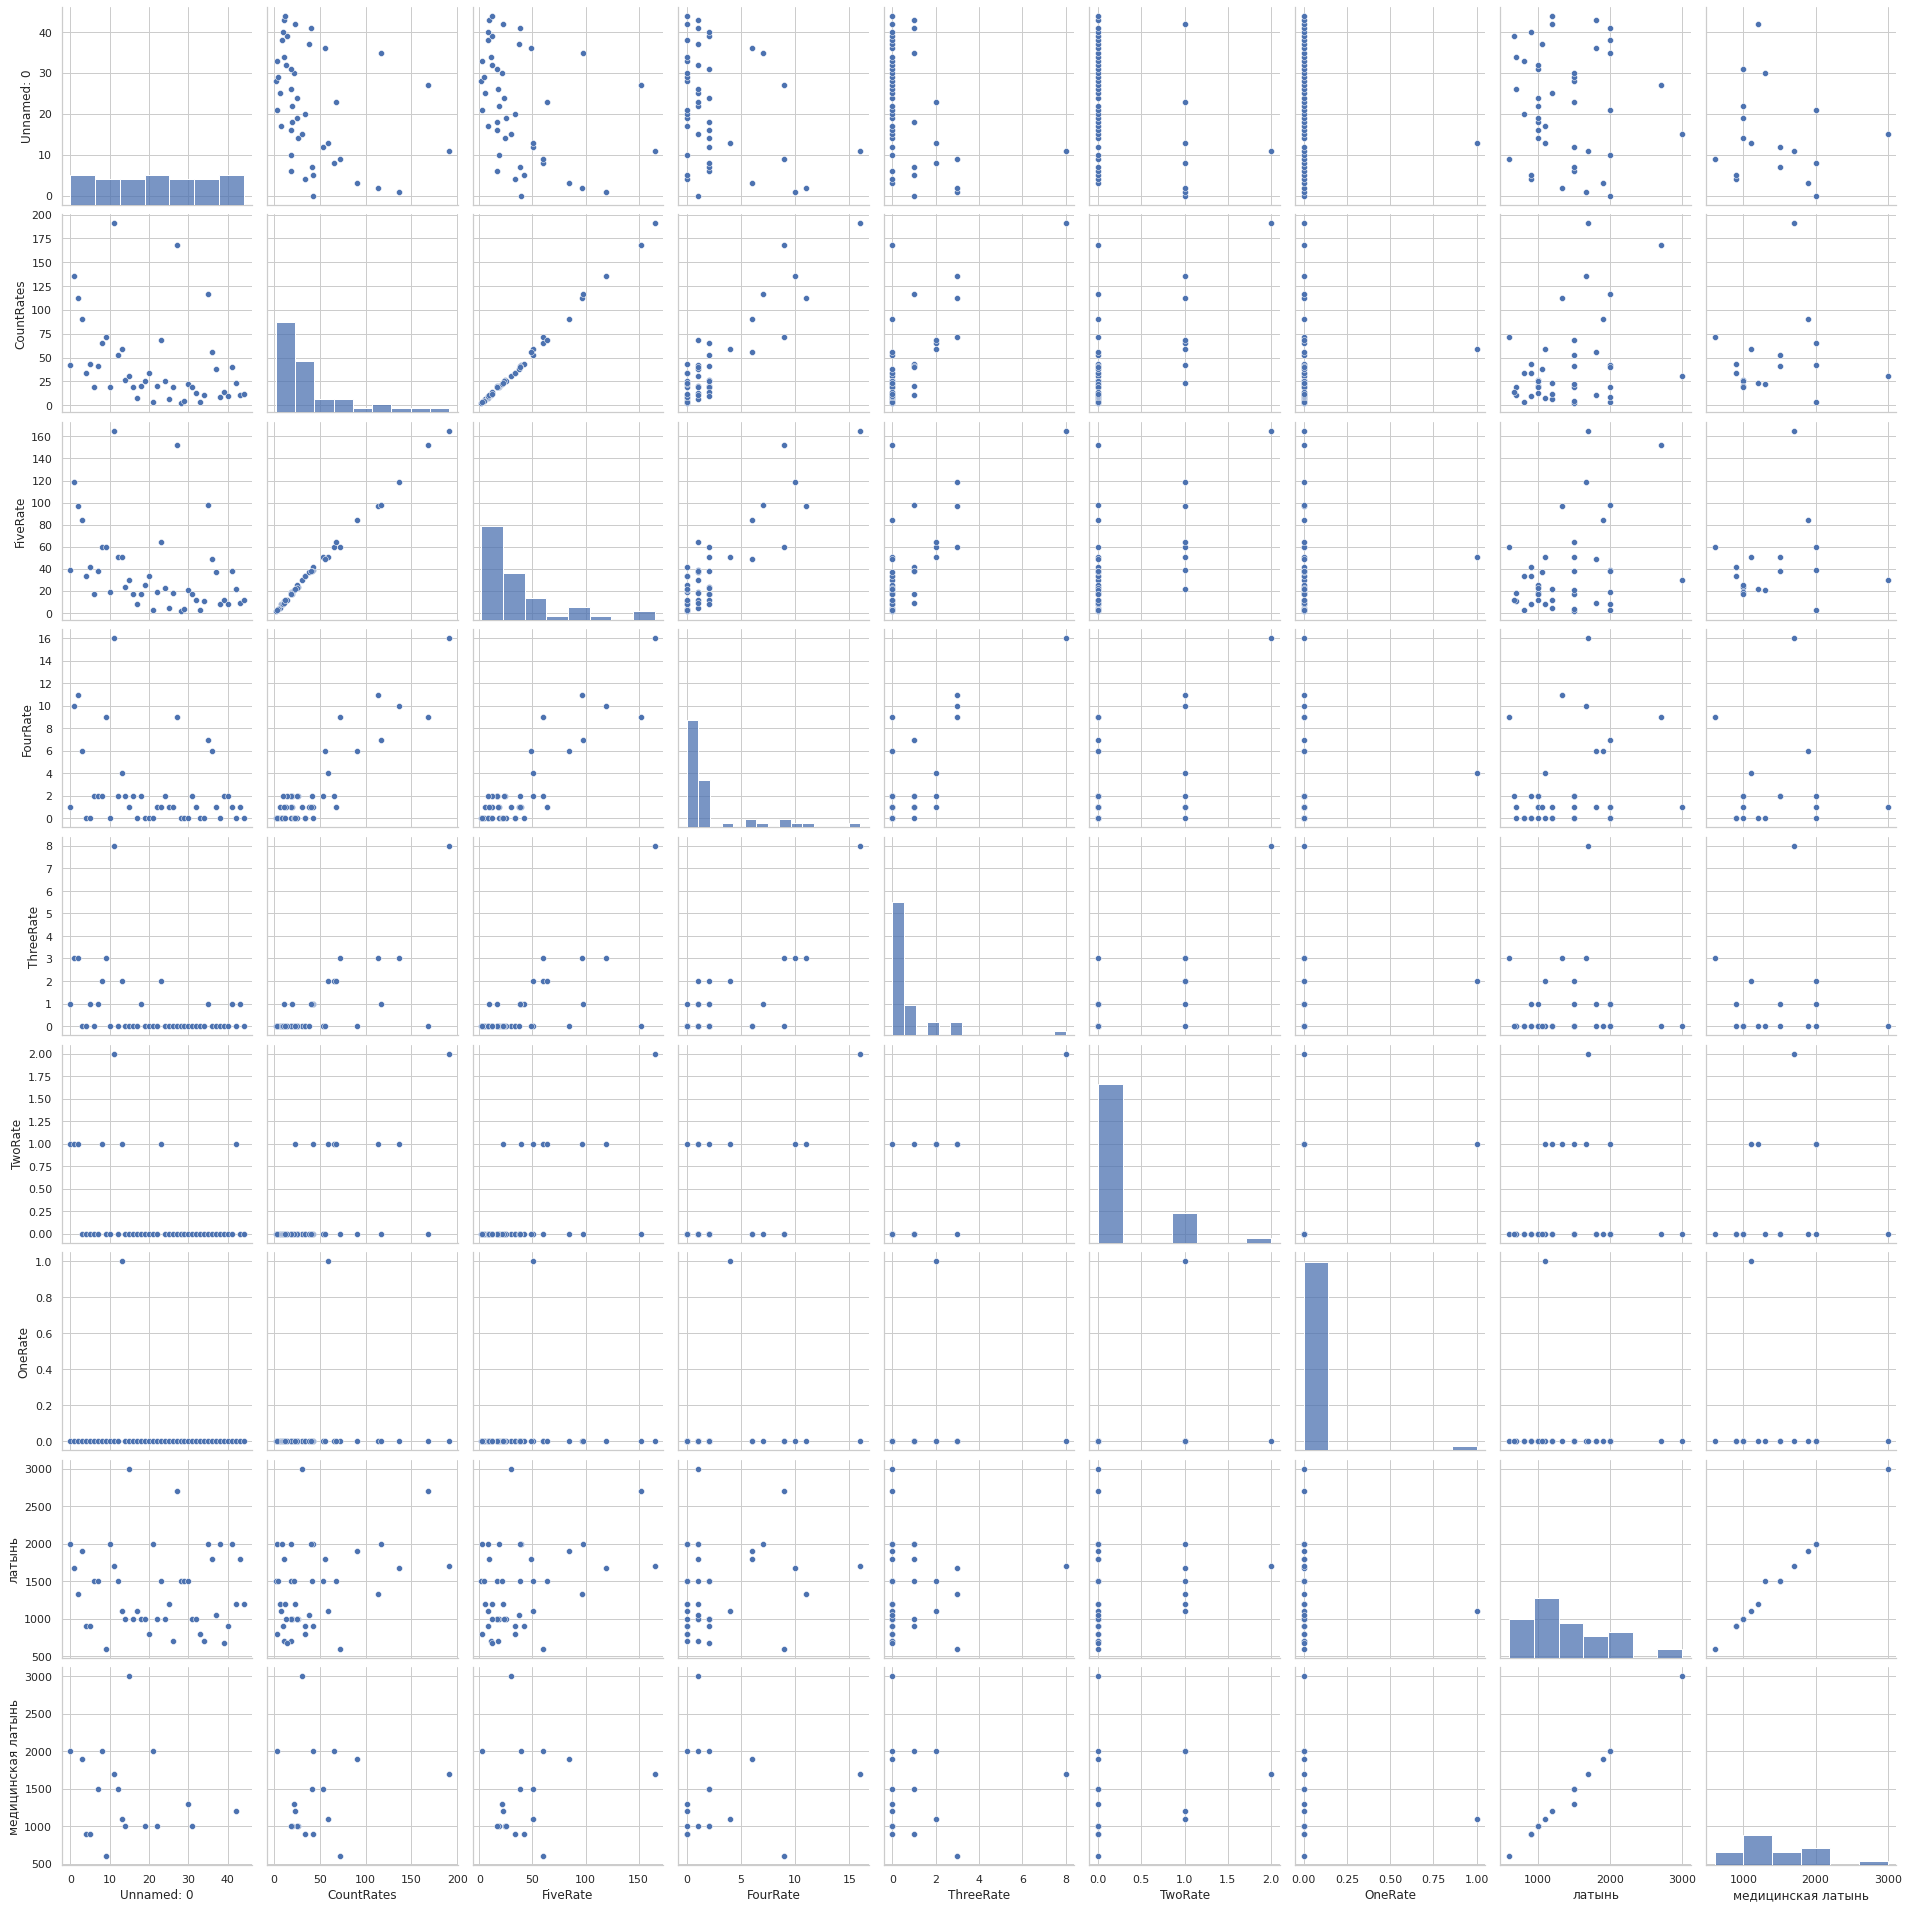

In [190]:
sns.set_style("whitegrid");
sns.pairplot(dataset, size=3);
plt.show()

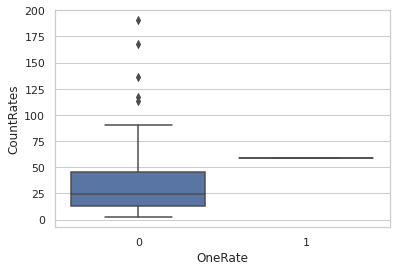

In [191]:
sns.boxplot(x='OneRate',y='CountRates',data=dataset)

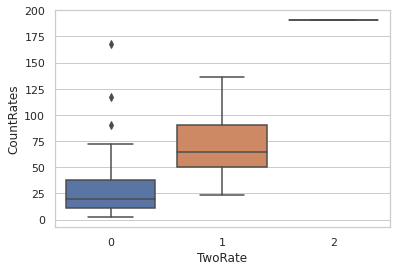

In [192]:
sns.boxplot(x='TwoRate',y='CountRates',data=dataset)

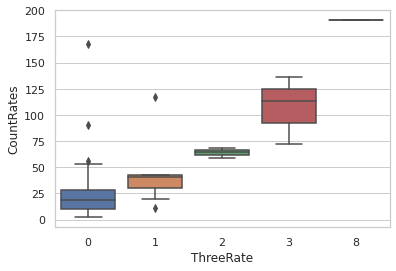

In [193]:
sns.boxplot(x='ThreeRate',y='CountRates',data=dataset)

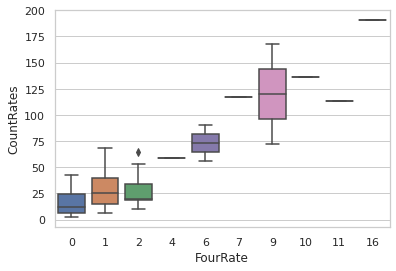

In [194]:
sns.boxplot(x='FourRate',y='CountRates',data=dataset)

In [195]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io
from collections import Counter

In [196]:
print(Counter(dataset['TotalRate']))

Counter({'5,0': 13, '4,86': 4, '4,89': 4, '4,92': 4, '4,95': 3, '4,80': 3, '4,93': 2, '4,97': 2, '4,82': 1, '4,90': 1, '4,79': 1, '4,96': 1, '4,75': 1, '4,88': 1, '4,83': 1, '4,94': 1, '4,87': 1, '4,73': 1})


In [210]:
df = dataset
row = df.sample(10)
print(row)
d = df[dataset.Fullname.str.lower().str.contains('а')].count()[0] / len(df)
print(f"{d:.2f}")

    Unnamed: 0                         Fullname  ...  латынь медицинская латынь
29          29      Александра Андреевна Лылова  ...  1500.0                NaN
19          19     Александр Владимирович Кузин  ...  1000.0             1000.0
6            6           Алла Васильевна Линько  ...  1500.0                NaN
14          14              Лев Игоревич Титлин  ...  1000.0             1000.0
11          11      Ирина Владимировна Тимонова  ...  1700.0             1700.0
43          43  Александра Робертовна Зиновьева  ...  1800.0                NaN
26          26         Людмила Николаевна Жарко  ...   700.0                NaN
32          32        Георгий Георгиевич Бончев  ...  1000.0                NaN
42          42          Роман Борисович Щетинин  ...  1200.0             1200.0
35          35       Виталий Николаевич Ковалев  ...  2000.0                NaN

[10 rows x 11 columns]
0.96


,mean
FourRate,
0,16.533333
1,27.100000
2,25.818182
4,51.000000
6,66.500000
7,98.000000
9,106.000000
10,119.000000
11,97.000000


<Figure size 2880x2880 with 0 Axes>

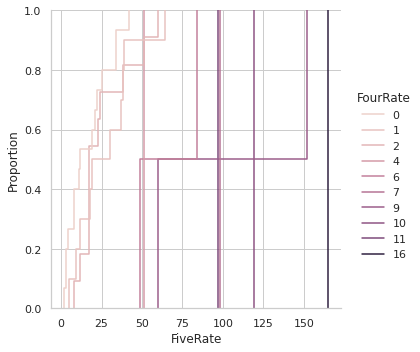

In [201]:
plt.figure(figsize=(40,40))
sns.displot(dataset, x="FiveRate", hue="FourRate", kind='ecdf')
dataset.groupby(['FourRate'])['FiveRate'].agg(['mean'])

In [202]:
column_1 = dataset["CountRates"]
column_2 = dataset["FiveRate"]
correlation = column_1.corr(column_2)
print(correlation)

0.9984098685895371


In [203]:
column_1 = dataset["CountRates"]
column_2 = dataset["FourRate"]
correlation = column_1.corr(column_2)
print(correlation)

0.8975548698980249


In [204]:
column_1 = dataset["CountRates"]
column_2 = dataset["ThreeRate"]
correlation = column_1.corr(column_2)
print(correlation)

0.7142046818432447


In [205]:
column_1 = dataset["CountRates"]
column_2 = dataset["TwoRate"]
correlation = column_1.corr(column_2)
print(correlation)

0.5915970389018943


In [206]:
column_1 = dataset["CountRates"]
column_2 = dataset["OneRate"]
correlation = column_1.corr(column_2)
print(correlation)

0.06250794970195978


In [207]:
column_1 = dataset["CountRates"]
column_2 = dataset["латынь"]
correlation = column_1.corr(column_2)
print(correlation)

0.37206287361077955


In [208]:
column_1 = dataset["CountRates"]
column_2 = dataset["медицинская латынь"]
correlation = column_1.corr(column_2)
print(correlation)

0.12300833874960264


In [211]:
df['TotalRate'] = df['TotalRate'].str.replace(',','.')
df

,Unnamed: 0,Fullname,CountRates,TotalRate,FiveRate,FourRate,ThreeRate,TwoRate,OneRate,латынь,медицинская латынь
0,0,Мария Юрьевна Ледышева,42,4.86,39,1,1,1,0,2000.0,2000.0
1,1,Михаил Михайлович Миральев,136,4.86,119,10,3,1,0,1670.0,NaN
2,2,Марк Арташесович Ширинян,113,4.82,97,11,3,1,0,1330.0,NaN
3,3,Юлия Александровна Василенко,90,4.93,84,6,0,0,0,1900.0,1900.0
4,4,Лилия Юрьевна Косова,34,5.0,34,0,0,0,0,900.0,900.0
5,5,Владимир Александрович Саляев,43,4.95,42,0,1,0,0,900.0,900.0
6,6,Алла Васильевна Линько,19,4.89,17,2,0,0,0,1500.0,NaN
7,7,Наталия Юрьевна Емелина,41,4.90,38,2,1,0,0,1500.0,1500.0
8,8,Екатерина Николаевна Трубина,65,4.86,60,2,2,1,0,NaN,2000.0
9,9,Ирина Вячеславовна Ковригина,72,4.79,60,9,3,0,0,600.0,600.0


In [212]:
column_1 = df["TotalRate"].astype(float)
new_time_F = column_1 / 1000000
column_2 = df["FiveRate"]
correlation = new_time_F.corr(column_2)
print(correlation)

-0.29838973344390285


Text(10.175000000000004, 0.5, 'Count')

<Figure size 1080x1080 with 0 Axes>

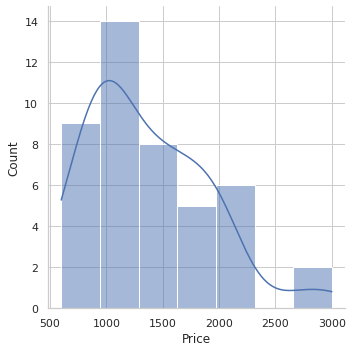

In [213]:
plt.figure(figsize=(15,15))
ax = sns.displot(df, x=df['латынь'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')

Text(10.175000000000004, 0.5, 'Count')

<Figure size 1080x1080 with 0 Axes>

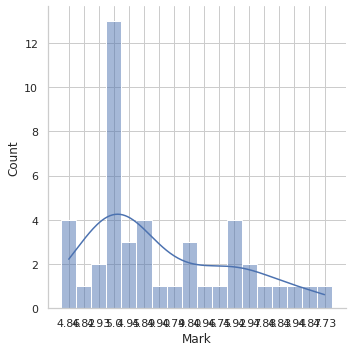

In [214]:
plt.figure(figsize=(15,15))
ax = sns.displot(df, x=df['TotalRate'], kde=True)
plt.xlabel('Mark')
plt.ylabel('Count')

Text(10.175000000000004, 0.5, 'Count')

<Figure size 1080x1080 with 0 Axes>

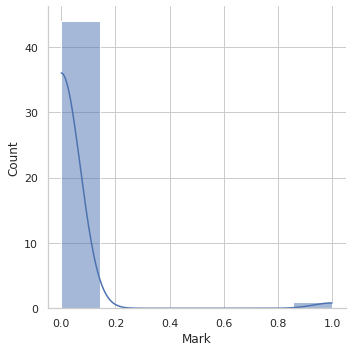

In [215]:
plt.figure(figsize=(15,15))
ax = sns.displot(df, x=df['OneRate'], kde=True)
plt.xlabel('Mark')
plt.ylabel('Count')

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso,  LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [231]:
X = dataset.CountRates
y = dataset.TotalRate

In [233]:
df = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split (df, y, test_size = 0.4, train_size=0.6, random_state=0)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)
df.head()

(27, 1) (27,)
(18, 1) (18,)


,CountRates
0,42
1,136
2,113
3,90
4,34


In [236]:
print('With StandartScaler')
scaler = StandardScaler()
X_train_standart = scaler.fit_transform(X_train)
X_test_standart = scaler.fit_transform(X_test)

reg_line.fit(X_train_standart, y_train)
y_predSTest = reg_line.predict(X_test_standart)
y_predSTrain = reg_line.predict(X_train_standart)

r_sqrt_test_st = reg_line.score(X_test_standart,y_test)
print('Test R^2:{}'.format(r_sqrt_test_st))
rmse_testSt=np.sqrt(mean_squared_error(y_test,y_predSTest))
print('Test RMSE:{}'.format(rmse_testSt))
print()

r_sqrt_train_st = reg_line.score(X_train_standart,y_train)
print('Train R^2:{}'.format(r_sqrt_train_st))
rmse_trainSt=np.sqrt(mean_squared_error(y_train,y_predSTrain))
print('Train RMSE:{}'.format(rmse_trainSt))
print()

#Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_standart,y_train)

ridge_test = ridge.score(X_test_standart, y_test)
print('Test Ridge:',ridge_test)

ridge_train = ridge.score(X_train_standart, y_train)
print('Train Ridge:',ridge_train)
print()

#Lasso
la = Lasso(alpha=0.01)
la.fit(X_train_standart, y_train)

lasso_test = la.score(X_test_standart, y_test)
print('Test Lasso:',lasso_test)

lasso_train = la.score(X_train_standart, y_train)
print('Train Lasso:',lasso_train)

With StandartScaler
Test R^2:0.0639334440437006
Test RMSE:0.08373495672248159

Train R^2:0.14133393187300491
Train RMSE:0.062033024133018394

Test Ridge: 0.063931534192334
Train Ridge: 0.1413339124999841

Test Lasso: 0.048545819676875435
Train Lasso: 0.11901988228622584
